In [99]:
import numpy as np
import skfmm
from numpy import ma
import matplotlib.pyplot as plt

In [112]:
class FMMPlanner(object):
    def __init__(self, traversable, step_size=1):
        """

        :param traversable: 2D np.ndarray boolean map , False for obstacle and True for free, unknow space
        :param step_size: number of stapes agent suppose to travel in every short steps it takes towards goal

        :type traversable: np.ndarray
        :type step_size: int
        """
        self.step_size = step_size
        self.traversable = traversable

    def set_goal(self, goal):
        """
        Helps to set the goal and calculate distance from goal, try to visualize dd to get more intuition
        :param goal: goal points in map space [x_goal_co-ordinate, y_goal_co-ordinate]
        :type goal: list
        """
        traversable_ma = ma.masked_values(self.traversable * 1, 0)
#         print(f'traversable_ma \n{traversable_ma}')
        goal_x, goal_y = int(goal[0]), int(goal[1])
        traversable_ma[goal_x, goal_y] = 0
        print(f'traversable_ma \n{traversable_ma}')
        dd = skfmm.distance(traversable_ma, dx=1)
        print(f'skfmm.distance \n{dd}')
        dd_mask = np.invert(np.isnan(ma.filled(dd, np.nan)))
#         print(f'dd_mask \n{dd_mask}')
        dd = ma.filled(dd, np.max(dd) + 1)
#         print(f'skfmm.distance \n{dd}')
        self.fmm_dist = dd
        plt.title("Dist to Goal")
        plt.imshow(self.fmm_dist, origin="lower")
        plt.show()

    def get_short_term_goal(self, state):
        """
        Given the current state of robot, function outputs where should robot move based on map and step size
        :param state: state of robot in map space [x_robot_map_co-ordinate, y_robot_map_co-ordinate]
        :type state: list
        :return: short term goal in map space where robot should move [x_map_co-ordinate, y_map_co-ordinate]
        :rtype: list
        """
        state = [int(x) for x in state]
        # pad the map with
        # to handle corners pad the dist with step size and values equal to max
        dist = np.pad(
            self.fmm_dist, self.step_size, "constant", constant_values=self.fmm_dist.shape[0] ** 2
        )
        plt.figure(figsize=(8, 4), constrained_layout=True)
        ax1 = plt.subplot(1, 2, 1)
        ax1.set_title("Dist to Goal")
        ax1.imshow(dist, origin="lower")
        # take subset of distance around the start, as its padded start should be corner instead of center
        print(f'subsetting {state[0], state[0] + 2 * self.step_size + 1, state[1], state[1] + 2 * self.step_size + 1}')
        subset = dist[
            state[0] : state[0] + 2 * self.step_size + 1,
            state[1] : state[1] + 2 * self.step_size + 1,
        ]
        
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title("Subset")
        ax2.imshow(subset, origin="lower")
        plt.show()
        
        print(f'dist \n{dist}')
        print(f'subset \n{subset}')

        # find the index which has minimum distance
        (stg_x, stg_y) = np.unravel_index(np.argmin(subset), subset.shape)
        print(f'stg_x, stg_y {stg_x, stg_y}, subset[stg_x][stg_y] {subset[stg_x][stg_y]}')
        # convert index from subset frame
        return (stg_x + state[0] - self.step_size) + 0.5, (stg_y + state[1] - self.step_size) + 0.5

traversable_ma 
[[1 1 1]
 [1 1 1]
 [1 0 1]]
skfmm.distance 
[[2.51447807 2.         2.51447807]
 [1.70710678 1.         1.70710678]
 [1.         0.         1.        ]]


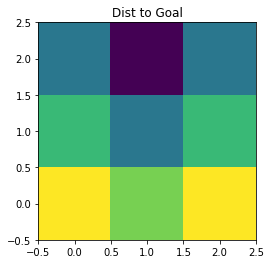

In [113]:
traversable = np.random.choice(a=[True, True], size=(3,3))
fmm = FMMPlanner(traversable)
fmm.set_goal((2,1))

subsetting (0, 3, 0, 3)


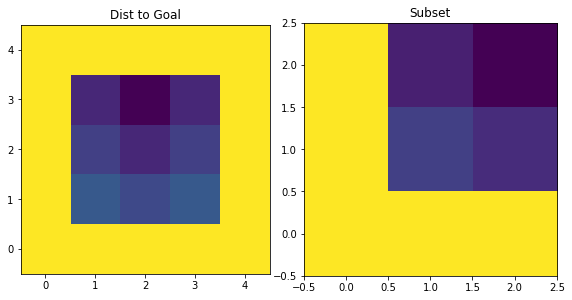

dist 
[[9.         9.         9.         9.         9.        ]
 [9.         2.51447807 2.         2.51447807 9.        ]
 [9.         1.70710678 1.         1.70710678 9.        ]
 [9.         1.         0.         1.         9.        ]
 [9.         9.         9.         9.         9.        ]]
subset 
[[9.         9.         9.        ]
 [9.         2.51447807 2.        ]
 [9.         1.70710678 1.        ]]
stg_x, stg_y (2, 2), subset[stg_x][stg_y] 1.0


(1.5, 1.5)

In [114]:
fmm.get_short_term_goal((0,0))

subsetting (1, 4, 1, 4)


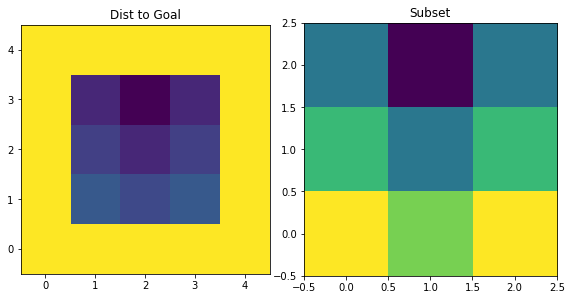

dist 
[[9.         9.         9.         9.         9.        ]
 [9.         2.51447807 2.         2.51447807 9.        ]
 [9.         1.70710678 1.         1.70710678 9.        ]
 [9.         1.         0.         1.         9.        ]
 [9.         9.         9.         9.         9.        ]]
subset 
[[2.51447807 2.         2.51447807]
 [1.70710678 1.         1.70710678]
 [1.         0.         1.        ]]
stg_x, stg_y (2, 1, 0.0)


(2.5, 1.5)

In [105]:
fmm.get_short_term_goal((1,1))

In [96]:
selem

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [98]:
traversable = np.random.choice(a=[True, True], size=(10,10))
print(traversable)
binary_dilation(traversable, selem) != True

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])